In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from hierataxo import OrderManager
import pickle as pkl
from lightning.pytorch.callbacks import BackboneFinetuning

In [99]:
from hierataxo.util import named_taxo_palette
from matplotlib.axes import Axes
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
# import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    # "text.usetex": True,
    # "text.latex.preamble": r"\usepackage{amsmath}",
    'svg.fonttype':'none',
    'font.sans-serif':['Arial','Helvetica',
        'DejaVu Sans',
        'Bitstream Vera Sans',
        'Computer Modern Sans Serif',
        'Lucida Grande',
        'Verdana',
        'Geneva',
        'Lucid',
        'Avant Garde',
        'sans-serif'],
    "pdf.use14corefonts":False,
    'pdf.fonttype':42,
        })
fonts = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#ms fonts
'sudo apt install ttf-mscorefonts-installer'
'sudo fc-cache -f'
#latex
'sudo apt-get install texlive-latex-extra texlive-fonts-recommended cm-super dvipng '
#


'sudo fc-cache -f'

In [101]:
import matplotlib.pyplot as plt
plt.close()
plt.scatter([0,0],[1,1])
plt.title('aaa')
plt.savefig('aa.pdf')
plt.close()
# fig,ax=plt.subplots(1,1)
# order_manager.draw_classification_view(named_taxo_palette,ax)
# plt.show()

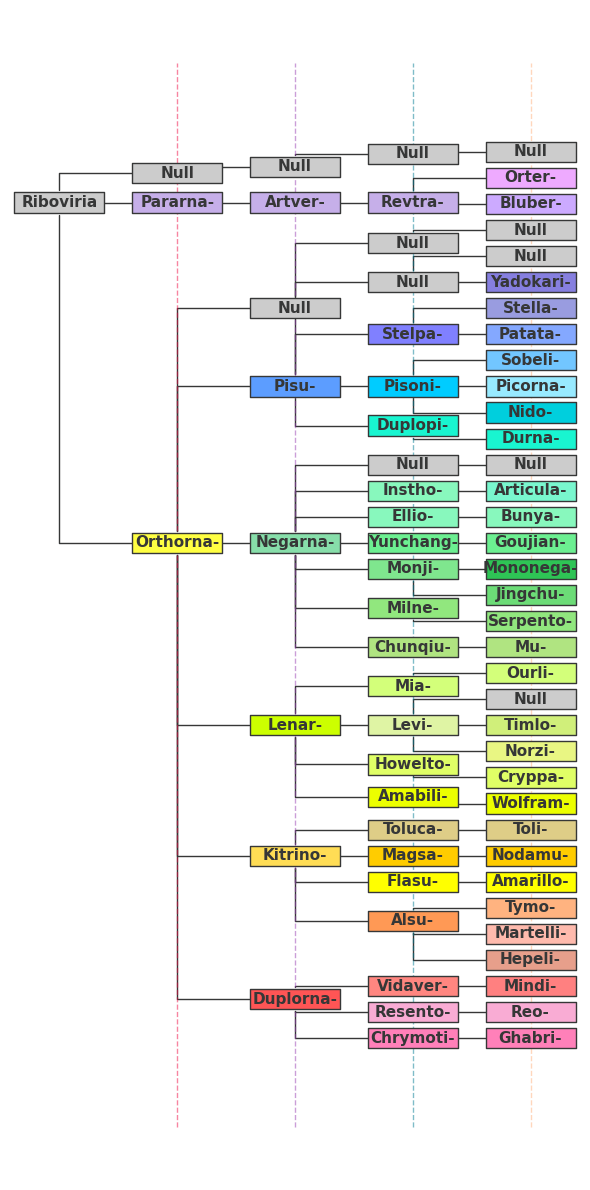

In [204]:
from hierataxo.util import named_taxo_palette
import matplotlib.colors as mcolors
import re
import networkx as nx
import numpy as np
import matplotlib.path as mpath
import numpy as np
from typing import Dict,Tuple
# order_manager=OrderManager(pkl.load(open('taxo_data/hierarchy_order.pkl','rb'))['Riboviria'],
#                         level_names=['Kingdom','Phylum','Class','Order'],layout_prog='twopi')

def layout_modification(G:nx.DiGraph):
    G.graph['rankdir']='LR'
    G.nodes['root']['root']=True

def manual_modify_graph_pos(graph_pos:Dict[str,Tuple[float,float]]):
    graph_xs=list(set([i[0] for i in graph_pos.values()]))
    graph_xs.sort()
    ideal_deltax=graph_xs[1]-graph_xs[0]
    ideal_graph_map={i:j for i,j in zip(
    graph_xs,
    np.linspace(graph_xs[0],graph_xs[0]+4*ideal_deltax,5).tolist()
        )} 
    graph_ys=[i[1] for i in graph_pos.values()]
    graph_ymin,graph_ymax=min(graph_ys),max(graph_ys)
    for k,v in graph_pos.items():
        graph_pos[k]=(ideal_graph_map.get(v[0],v[0]),graph_ymin+graph_ymax-v[1])
s5=5**0.5
vertices = [
    (-s5, -1/2),   
    (-s5, 1/2),    
    (s5, 1/2),     
    (s5, -1/2),    
    (-s5, -1/2),   
]
codes = [
    mpath.Path.MOVETO,  
    mpath.Path.LINETO,  
    mpath.Path.LINETO, 
    mpath.Path.LINETO,  
    mpath.Path.CLOSEPOLY, 
]

path = mpath.Path(vertices, codes)

order_manager=OrderManager(pkl.load(open('taxo_data/hierarchy_order.pkl','rb'))['Riboviria'],
                        level_names=['Kingdom','Phylum','Class','Order'],layout_prog='dot',layout_modification=layout_modification)

manual_modify_graph_pos(order_manager.graph_pos)
plt.close()
fig,ax=plt.subplots(1,1,figsize=(6,12))
pattern = r'virae|viricota|viricetes|virales'
def to_label(x:str):
    if 'Null' in x:
        return 'Null'
    elif re.search(pattern, x):
        return re.sub(pattern, '-', x)
    elif x=='root':
        return 'Riboviria'
    else:
        return x
order_manager.draw_classification_view(named_taxo_palette,ax,null_color=(0.8,0.8,0.8),to_label=to_label,node_size=4200,level_boundary='none',
                                       arrowstyle='-',node_shape=path,
                                       connectionstyle="angle,angleA=-90,angleB=180,rad=0")
plt.tight_layout()
plt.show()
fig.savefig('colormap.svg')

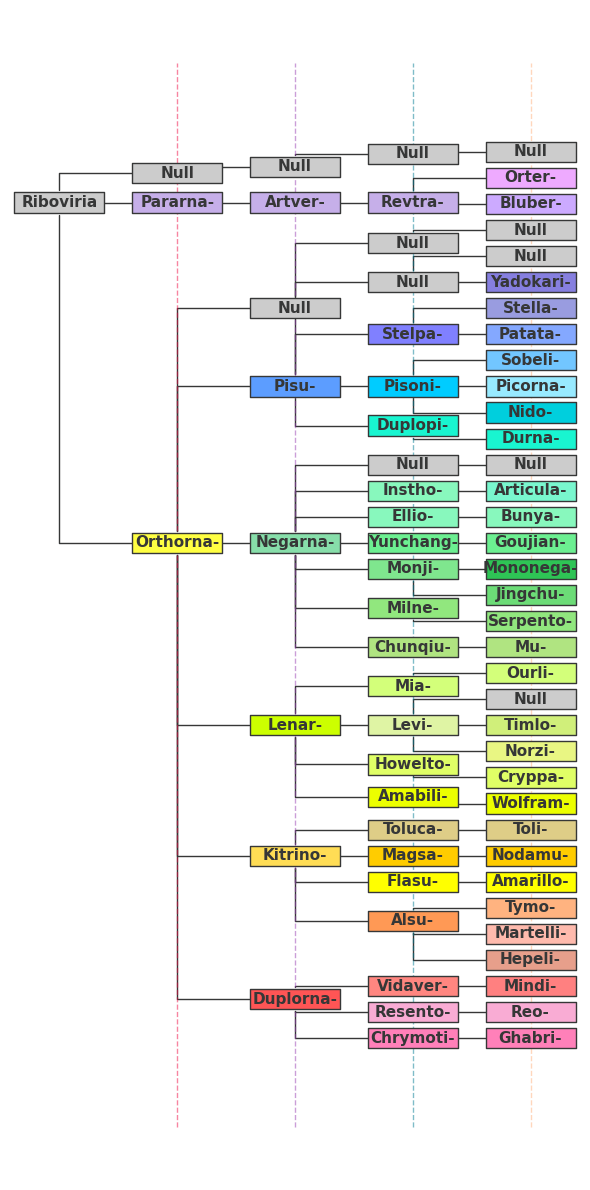

In [200]:


graph_xs=list(set([i[0] for i in order_manager.graph_pos.values()]))
graph_xs.sort()
ideal_deltax=graph_xs[1]-graph_xs[0]
ideal_graph_map={i:j for i,j in zip(
    graph_xs,
    np.linspace(graph_xs[0],graph_xs[0]+4*ideal_deltax,5).tolist()
)} 
plt.close()
fig,ax=plt.subplots(1,1,figsize=(6,12))
pattern = r'virae|viricota|viricetes|virales'
def to_label(x:str):
    if 'Null' in x:
        return 'Null'
    elif re.search(pattern, x):
        return re.sub(pattern, '-', x)
    elif x=='root':
        return 'Riboviria'
    else:
        return x
    


order_manager.draw_classification_view(named_taxo_palette,ax,null_color=(0.8,0.8,0.8),to_label=to_label,node_size=4200,level_boundary='none',
                                       arrowstyle='-',node_shape=path,
                                       connectionstyle="angle,angleA=-90,angleB=180,rad=0")
fig.tight_layout()
plt.show()
# fig.savefig('colormap.svg')

In [186]:
order_manager.levels

[['Null', 'Orthornavirae', 'Pararnavirae'],
 ['Null',
  'Duplornaviricota',
  'Kitrinoviricota',
  'Lenarviricota',
  'Negarnaviricota',
  'Pisuviricota',
  'Artverviricota'],
 ['Null',
  'Chrymotiviricetes',
  'Resentoviricetes',
  'Vidaverviricetes',
  'Alsuviricetes',
  'Flasuviricetes',
  'Magsaviricetes',
  'Tolucaviricetes',
  'Amabiliviricetes',
  'Howeltoviricetes',
  'Leviviricetes',
  'Miaviricetes',
  'Chunqiuviricetes',
  'Milneviricetes',
  'Monjiviricetes',
  'Yunchangviricetes',
  'Ellioviricetes',
  'Insthoviricetes',
  'Duplopiviricetes',
  'Pisoniviricetes',
  'Stelpaviricetes',
  'Revtraviricetes'],
 ['Null',
  'Ghabrivirales',
  'Reovirales',
  'Mindivirales',
  'Hepelivirales',
  'Martellivirales',
  'Tymovirales',
  'Amarillovirales',
  'Nodamuvirales',
  'Tolivirales',
  'Wolframvirales',
  'Cryppavirales',
  'Norzivirales',
  'Timlovirales',
  'Ourlivirales',
  'Muvirales',
  'Serpentovirales',
  'Jingchuvirales',
  'Mononegavirales',
  'Goujianvirales',
  'Buny

{27.0: 27.0, 149.79: 149.79, 328.78: 272.58, 553.92: 395.37, 824.54: 518.16}

In [165]:
graph_xs

[27.0, 149.79, 328.78, 553.92, 824.54]

In [147]:
max([i[1] for i in order_manager.graph_pos.values()])

1854.0

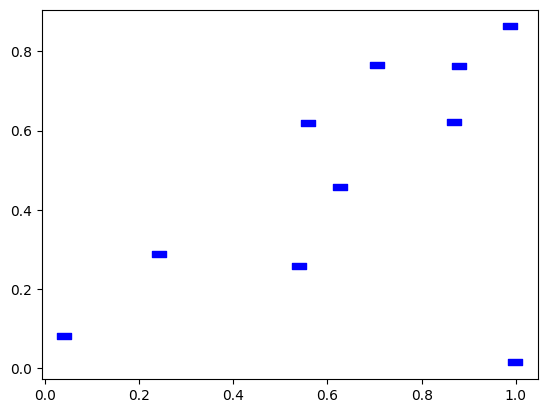

In [141]:
import matplotlib.path as mpath
vertices = [
    (-2, -1),   # 左下角
    (-2, 1),    # 左上角
    (2, 1),     # 右上角
    (2, -1),    # 右下角
    (-2, -1),   # 关闭路径到左下角
]
codes = [
    mpath.Path.MOVETO,  # 移动到第一个点
    mpath.Path.LINETO,  # 继续线到第二个点
    mpath.Path.LINETO,  # 继续线到第三个点
    mpath.Path.LINETO,  # 继续线到第四个点
    mpath.Path.CLOSEPOLY,  # 关闭路径
]
import numpy as np
# 创建路径对象
path = mpath.Path(vertices, codes)
x = np.random.rand(10)
y = np.random.rand(10)

# 创建散点图，使用自定义的长方形标记
fig, ax = plt.subplots()
ax.scatter(x, y, s=100, c='blue', marker=path)

plt.show()

In [121]:
dimgrey=mcolors.XKCD_COLORS['xkcd:dark grey']

In [125]:
xkcd_color=lambda x:mcolors.to_rgb(mcolors.XKCD_COLORS[f'xkcd:{x}'])
xkcd_color('dark grey')

(0.21176470588235294, 0.21568627450980393, 0.21568627450980393)

In [123]:
dimgrey

'#363737'

findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'fantasy' not found because none of the following families were found: Chicago, Charcoal, Impact, Western, xkcd script, fantasy
findfont: Generic family 'fantasy' not found because none of the following families were found: Chicago, Charcoal, Impact, Western, xkcd script, fantasy
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chan

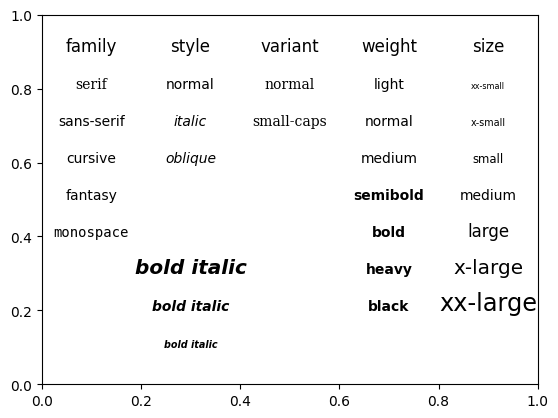

In [78]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
_,fig = plt.subplots(1,1)
alignment = {'horizontalalignment': 'center', 'verticalalignment': 'baseline'}
yp = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
heading_font = FontProperties(size='large')

# Show family options
fig.text(0.1, 0.9, 'family', fontproperties=heading_font, **alignment)
families = ['serif', 'sans-serif', 'cursive', 'fantasy', 'monospace']
for k, family in enumerate(families):
    font = FontProperties()
    font.set_family(family)
    fig.text(0.1, yp[k], family, fontproperties=font, **alignment)

# Show style options
styles = ['normal', 'italic', 'oblique']
fig.text(0.3, 0.9, 'style', fontproperties=heading_font, **alignment)
for k, style in enumerate(styles):
    font = FontProperties()
    font.set_family('sans-serif')
    font.set_style(style)
    fig.text(0.3, yp[k], style, fontproperties=font, **alignment)

# Show variant options
variants = ['normal', 'small-caps']
fig.text(0.5, 0.9, 'variant', fontproperties=heading_font, **alignment)
for k, variant in enumerate(variants):
    font = FontProperties()
    font.set_family('serif')
    font.set_variant(variant)
    fig.text(0.5, yp[k], variant, fontproperties=font, **alignment)

# Show weight options
weights = ['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black']
fig.text(0.7, 0.9, 'weight', fontproperties=heading_font, **alignment)
for k, weight in enumerate(weights):
    font = FontProperties()
    font.set_weight(weight)
    fig.text(0.7, yp[k], weight, fontproperties=font, **alignment)

# Show size options
sizes = [
    'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large']
fig.text(0.9, 0.9, 'size', fontproperties=heading_font, **alignment)
for k, size in enumerate(sizes):
    font = FontProperties()
    font.set_size(size)
    fig.text(0.9, yp[k], size, fontproperties=font, **alignment)

# Show bold italic
font = FontProperties(style='italic', weight='bold', size='x-small')
fig.text(0.3, 0.1, 'bold italic', fontproperties=font, **alignment)
font = FontProperties(style='italic', weight='bold', size='medium')
fig.text(0.3, 0.2, 'bold italic', fontproperties=font, **alignment)
font = FontProperties(style='italic', weight='bold', size='x-large')
fig.text(0.3, 0.3, 'bold italic', fontproperties=font, **alignment)

plt.show()
plt.close()
# _.savefig('xx.pdf')